In [3]:
import os
from datetime import datetime, timedelta

import pandas as pd
from pyathena import connect

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

In [4]:
athena = connect(
    aws_access_key_id=os.environ['AWS_ACCESS_KEY_ID'],
    aws_secret_access_key=os.environ['AWS_SECRET_ACCESS_KEY'],
    s3_staging_dir=os.environ['S3_STAGING_DIR'],
    region_name=os.environ['REGION_NAME'])

In [5]:
query = """
    SELECT
        device,
        user, 
        local,
        id,
        session_id,
        act,
        CASE WHEN package = 'xprize' THEN 'kitkit' ELSE package END AS package,
        content,
        egg,
        day,
        contentname,
        ROUND(CAST(duration AS double), 2) AS duration
    FROM dw_src.tb_src_rohingya
    WHERE 1=1
        AND act IN ('quit', 'exit', 'complete', 'finish')
        AND content != ''
        AND DATE(local) >= DATE('2019-01-01')
    ORDER BY 1, 2;
"""

base_df = pd.read_sql(query, athena)

In [6]:
base_df['yyyymmdd'] = base_df.local.astype('datetime64[D]')
base_df['duration_min'] = round(base_df.duration/60, 2)
base_df.head()

device      user                   local     id  session_id   act  \
0  6111000063  t5-user1 2020-01-27 04:43:53.440  47205       47203  quit   
1  6111000063  t5-user1 2019-12-01 04:29:50.759   7537          -1  exit   
2  6111000063  t5-user1 2019-12-01 04:29:45.700   7533          -1  exit   
3  6111000063  t5-user1 2019-12-01 04:29:37.634   7529          -1  exit   
4  6111000063  t5-user1 2019-12-01 04:18:11.251   7294          -1  exit   

   package content egg day               contentname  duration   yyyymmdd  \
0   kitkit    game   4               EggQuizLiteracy      8.48 2020-01-27   
1  library   video               100 Little Chickens      1.68 2019-12-01   
2  library   video          Welcome to Kitkit School      3.75 2019-12-01   
3  library   video          Welcome to Kitkit School      1.80 2019-12-01   
4  library   video                             Hello      1.21 2019-12-01   

   duration_min  
0          0.14  
1          0.03  
2          0.06  
3          0.03  
4          0.02

In [7]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441068 entries, 0 to 441067
Data columns (total 14 columns):
device          441068 non-null object
user            441068 non-null object
local           441068 non-null datetime64[ns]
id              441068 non-null int64
session_id      441068 non-null int64
act             441068 non-null object
package         441068 non-null object
content         441068 non-null object
egg             441068 non-null object
day             441068 non-null object
contentname     441068 non-null object
duration        441068 non-null float64
yyyymmdd        441068 non-null datetime64[ns]
duration_min    441068 non-null float64
dtypes: datetime64[ns](2), float64(2), int64(2), object(8)
memory usage: 47.1+ MB


In [8]:
session_df = pd.read_csv('./source/users30.csv', header=None, names=['device', 'yyyymmdd', 'session_count', 'user1', 'user2', 'user3'])
session_df['yyyymmdd'] = session_df.yyyymmdd.astype('datetime64[D]')
session_df = session_df[session_df.yyyymmdd >= '2019-01-01']
session_df

device   yyyymmdd  session_count  user1  user2  user3
0     6118003272 2019-11-17              1      0      1      1
1     6118003272 2019-11-20              2      5      3      3
2     6118003272 2019-11-21              0      1      0      0
3     6118003272 2019-11-24              2      2      2      0
4     6118003272 2019-11-25              2      4      2      2
5     6118003272 2019-11-26              2      2      2      1
6     6118003272 2019-11-27              1      1      1      1
7     6118003272 2019-12-01              1      2      1      2
8     6118003272 2019-12-02              3      2      1      2
9     6118003272 2019-12-03              3      3      3      1
10    6118003272 2019-12-04              1      2      0      1
11    6118003272 2019-12-08              2      1      1      1
12    6118003272 2019-12-10              2      3      1      3
13    6118003272 2019-12-11              2      1      1      1
14    6118003272 2019-12-15              2      3      2      1
15    6118003272 2019-12-17              3      1      1      2
16    6118003272 2019-12-18              2      2      1      2
17    6118003272 2019-12-22              3      3      1      3
18    6118003272 2019-12-23              3      2      2      3
19    6118003272 2019-12-24              3      4      3      3
20    6118003272 2020-01-05              3      1      1      1
21    6118003272 2020-01-06              3      2      1      2
22    6118003272 2020-01-07              3      1      1      2
23    6118003272 2020-01-08              4      4      2      4
24    6118003272 2020-01-12              2      3      3      0
25    6118003272 2020-01-13              2      2      3      1
26    6118003272 2020-01-14              3      1      1      1
27    6118003272 2020-01-15              2      2      3      2
28    6118003272 2020-01-19              3      2      2      1
29    6118003272 2020-01-20              3      3      3      1
...          ...        ...            ...    ...    ...    ...
4131  6115001535 2020-01-22              1      1      0      0
4132  6115001535 2020-01-26              2      1      0      1
4133  6115001535 2020-01-27              2      0      1      1
4134  6115001535 2020-01-28              2      0      1      1
4135  6115001535 2020-01-29              2      1      1      1
4136  6115001535 2020-01-30              2      1      1      0
4137  6115001535 2020-02-02              3      1      0      1
4138  6115001535 2020-02-03              3      1      1      1
4139  6115001535 2020-02-04              3      3      1      2
4140  6115001535 2020-02-05              1      1      0      0
4141  6115001535 2020-02-09              3      1      1      1
4142  6115001535 2020-02-10              2      2      1      1
4143  6115001535 2020-02-11              3      1      1      1
4144  6115001535 2020-02-12              2      1      0      1
4145  6115001535 2020-02-16              3      1      1      1
4146  6115001535 2020-02-17              2      1      1      1
4147  6115001535 2020-02-18              3      2      2      2
4148  6115001535 2020-02-19              0      1      0      0
4149  6115001535 2020-02-23              4      4      2      2
4150  6115001535 2020-02-24              3      1      1      1
4151  6115001535 2020-02-25              3      1      1      1
4152  6115001535 2020-02-26              3      1      1      1
4153  6115001535 2020-03-01              2      2      0      2
4154  6115001535 2020-03-02              3      1      1      1
4155  6115001535 2020-03-03              3      3      2      3
4156  6115001535 2020-03-04              3      2      1      2
4157  6115001535 2020-03-08              3      1      1      1
4158  6115001535 2020-03-09              3      2      1      1
4159  6115001535 2020-03-10              3      1      1      1
4160  6115001535 2020-03-11              2      2      0      2

[4130 rows x 6 columns]

In [9]:
daily_package_playtime_df = base_df.groupby(['yyyymmdd', 'package']).agg({'duration_min':'sum'}).reset_index()
daily_package_playtime_df = daily_package_playtime_df[daily_package_playtime_df.duration_min>5]
daily_package_playtime_df

yyyymmdd  package  duration_min
0   2019-11-17   kitkit       3200.21
1   2019-11-17  library       1089.92
2   2019-11-18   kitkit       1525.23
3   2019-11-18  library        174.47
4   2019-11-19   kitkit        750.56
5   2019-11-19  library        119.98
6   2019-11-20   kitkit       4354.42
7   2019-11-20  library       1323.85
8   2019-11-21   kitkit        578.06
9   2019-11-21  library         27.56
10  2019-11-24   kitkit       5015.28
11  2019-11-24  library       1776.08
12  2019-11-25   kitkit       7531.88
13  2019-11-25  library       1429.08
14  2019-11-26   kitkit       5173.78
15  2019-11-26  library        901.28
16  2019-11-27   kitkit       5155.82
17  2019-11-27  library       1053.63
18  2019-12-01   kitkit       5018.14
19  2019-12-01  library        949.36
20  2019-12-02   kitkit       6869.79
21  2019-12-02  library       1032.66
22  2019-12-03   kitkit       6726.16
23  2019-12-03  library       1312.12
24  2019-12-04   kitkit       6310.53
25  2019-12-04  library        732.80
26  2019-12-08   kitkit       6500.05
27  2019-12-08  library       1235.29
29  2019-12-10   kitkit       7449.76
30  2019-12-10  library        881.98
..         ...      ...           ...
98  2020-02-17   kitkit       8229.32
99  2020-02-17  library       1663.34
100 2020-02-18   kitkit       8001.67
101 2020-02-18  library       1306.32
102 2020-02-19   kitkit       5448.99
103 2020-02-19  library       1637.69
104 2020-02-23   kitkit       7121.42
105 2020-02-23  library       1729.04
106 2020-02-24   kitkit       6987.39
107 2020-02-24  library       1386.26
108 2020-02-25   kitkit       7046.70
109 2020-02-25  library       1600.05
110 2020-02-26   kitkit       7181.07
111 2020-02-26  library       1442.47
112 2020-03-01   kitkit       6083.44
113 2020-03-01  library       1952.09
114 2020-03-02   kitkit       6653.07
115 2020-03-02  library       1428.21
116 2020-03-03   kitkit       5802.79
117 2020-03-03  library       1413.06
118 2020-03-04   kitkit       5686.10
119 2020-03-04  library       1660.47
120 2020-03-08   kitkit       5999.34
121 2020-03-08  library       1481.80
122 2020-03-09   kitkit       5672.79
123 2020-03-09  library       1651.29
124 2020-03-10   kitkit       5749.84
125 2020-03-10  library       1954.32
126 2020-03-11   kitkit       7309.91
127 2020-03-11  library       1804.10

[126 rows x 3 columns]

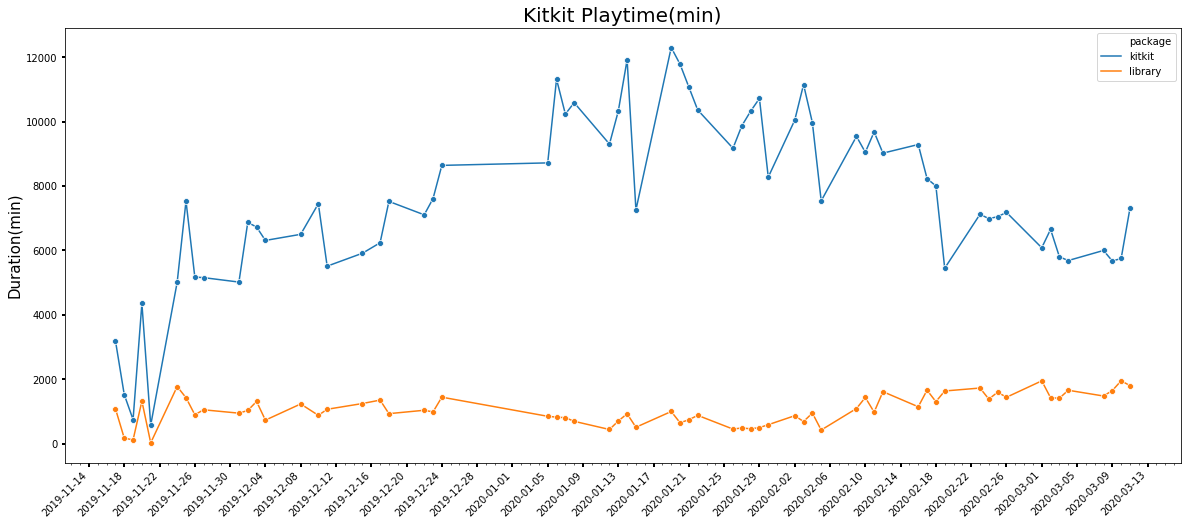

In [10]:
plt.figure(figsize=(20,8))
line = sns.lineplot(x='yyyymmdd', y='duration_min', data=daily_package_playtime_df, hue='package', marker='o')
plt.title('Kitkit Playtime(min)', size=20)
plt.xlabel('')
plt.ylabel('Duration(min)', size=15)
plt.xticks(rotation='45', ha='right')
line.tick_params(which='major', width=2)
line.xaxis.set_major_locator(mdates.DayLocator(interval=4))
line.xaxis.set_minor_locator(mdates.DayLocator())
line.xaxis.set_minor_formatter(ticker.NullFormatter())
plt.show()

In [11]:
daily_content_playtime_df = base_df.groupby(['yyyymmdd', 'content']).agg({'duration_min':'sum'}).reset_index()
daily_content_playtime_df = daily_content_playtime_df[daily_content_playtime_df.duration_min>5]
daily_content_playtime_df

yyyymmdd content  duration_min
0   2019-11-17    book          9.65
1   2019-11-17    game       2990.75
2   2019-11-17   video       1289.73
3   2019-11-18    game       1492.75
4   2019-11-18   video        206.95
5   2019-11-19    game        585.19
6   2019-11-19   video        285.35
7   2019-11-20    book         23.74
8   2019-11-20    game       3721.66
9   2019-11-20   video       1932.87
10  2019-11-21    book          6.84
11  2019-11-21    game        502.17
12  2019-11-21   video         96.61
13  2019-11-24    book         46.68
14  2019-11-24    game       4346.86
15  2019-11-24   video       2397.82
16  2019-11-25    book         86.55
17  2019-11-25    game       6563.00
18  2019-11-25   video       2311.41
19  2019-11-26    book        102.47
20  2019-11-26    game       4229.07
21  2019-11-26   video       1743.52
22  2019-11-27    book        142.84
23  2019-11-27    game       4007.76
24  2019-11-27   video       2058.85
25  2019-12-01    book        183.43
26  2019-12-01    game       3909.70
27  2019-12-01   video       1874.37
28  2019-12-02    book        279.97
29  2019-12-02    game       5163.10
..         ...     ...           ...
159 2020-02-25    book        190.65
160 2020-02-25    game       5972.33
161 2020-02-25   video       2483.77
162 2020-02-26    book        260.05
163 2020-02-26    game       6147.89
164 2020-02-26   video       2215.60
165 2020-03-01    book        178.21
166 2020-03-01    game       5150.63
167 2020-03-01   video       2706.69
168 2020-03-02    book        188.44
169 2020-03-02    game       5792.08
170 2020-03-02   video       2100.76
171 2020-03-03    book        153.66
172 2020-03-03    game       5010.14
173 2020-03-03   video       2052.05
174 2020-03-04    book        170.79
175 2020-03-04    game       4855.83
176 2020-03-04   video       2319.95
177 2020-03-08    book        155.41
178 2020-03-08    game       5245.36
179 2020-03-08   video       2080.37
180 2020-03-09    book        115.80
181 2020-03-09    game       4994.94
182 2020-03-09   video       2213.34
183 2020-03-10    book        115.66
184 2020-03-10    game       5140.19
185 2020-03-10   video       2448.31
186 2020-03-11    book        135.23
187 2020-03-11    game       6650.84
188 2020-03-11   video       2327.94

[187 rows x 3 columns]

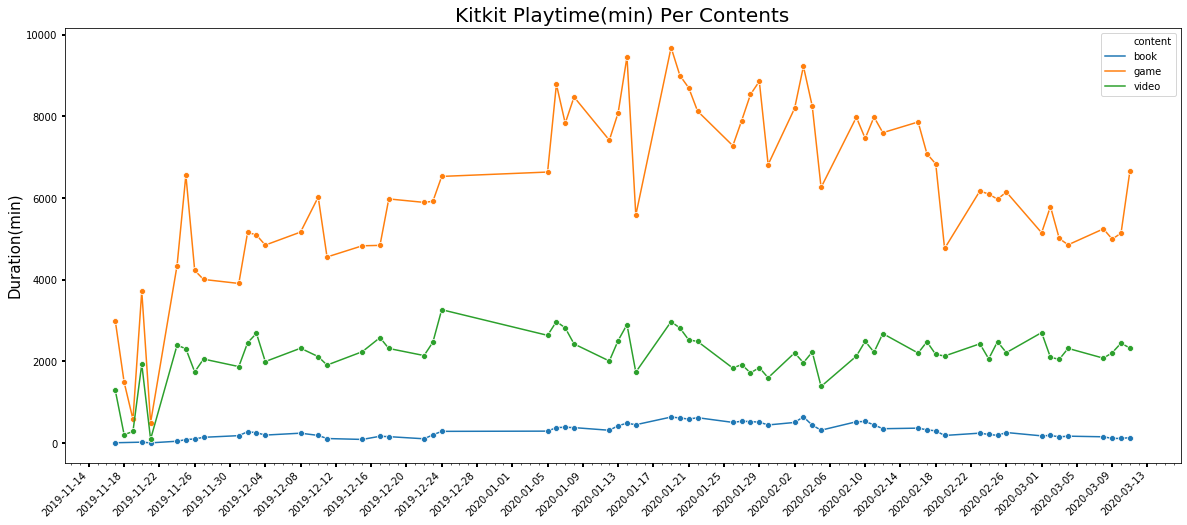

In [12]:
plt.figure(figsize=(20, 8))
line = sns.lineplot(x='yyyymmdd', y='duration_min', data=daily_content_playtime_df, hue='content', marker='o')
plt.title('Kitkit Playtime(min) Per Contents', size=20)
plt.xlabel('')
plt.ylabel('Duration(min)', size=15)
plt.xticks(rotation='45', ha='right')
line.tick_params(which='major', width=2)
line.xaxis.set_major_locator(mdates.DayLocator(interval=4))
line.xaxis.set_minor_locator(mdates.DayLocator())
line.xaxis.set_minor_formatter(ticker.NullFormatter())
plt.show()

In [13]:
device_df = base_df.groupby(['yyyymmdd']).agg({'device':'nunique'}).reset_index()
device_df = device_df[device_df.device > 2]
device_df

yyyymmdd  device
0  2019-11-17      66
1  2019-11-18      10
2  2019-11-19      10
3  2019-11-20      69
4  2019-11-21      19
5  2019-11-24      66
6  2019-11-25      69
7  2019-11-26      65
8  2019-11-27      65
9  2019-12-01      65
10 2019-12-02      64
11 2019-12-03      65
12 2019-12-04      61
13 2019-12-08      67
15 2019-12-10      69
16 2019-12-11      66
17 2019-12-15      68
18 2019-12-17      66
19 2019-12-18      67
20 2019-12-22      67
21 2019-12-23      66
22 2019-12-24      67
23 2020-01-05      71
24 2020-01-06      71
25 2020-01-07      71
26 2020-01-08      70
27 2020-01-12      71
28 2020-01-13      71
29 2020-01-14      73
30 2020-01-15      68
..        ...     ...
35 2020-01-22      69
36 2020-01-26      71
37 2020-01-27      67
38 2020-01-28      68
39 2020-01-29      68
40 2020-01-30      70
41 2020-02-02      70
42 2020-02-03      71
43 2020-02-04      69
44 2020-02-05      60
45 2020-02-09      66
46 2020-02-10      67
47 2020-02-11      68
48 2020-02-12      68
49 2020-02-16      68
50 2020-02-17      68
51 2020-02-18      65
52 2020-02-19      63
53 2020-02-23      63
54 2020-02-24      63
55 2020-02-25      64
56 2020-02-26      64
57 2020-03-01      62
58 2020-03-02      64
59 2020-03-03      63
60 2020-03-04      65
61 2020-03-08      64
62 2020-03-09      62
63 2020-03-10      65
64 2020-03-11      65

[63 rows x 2 columns]

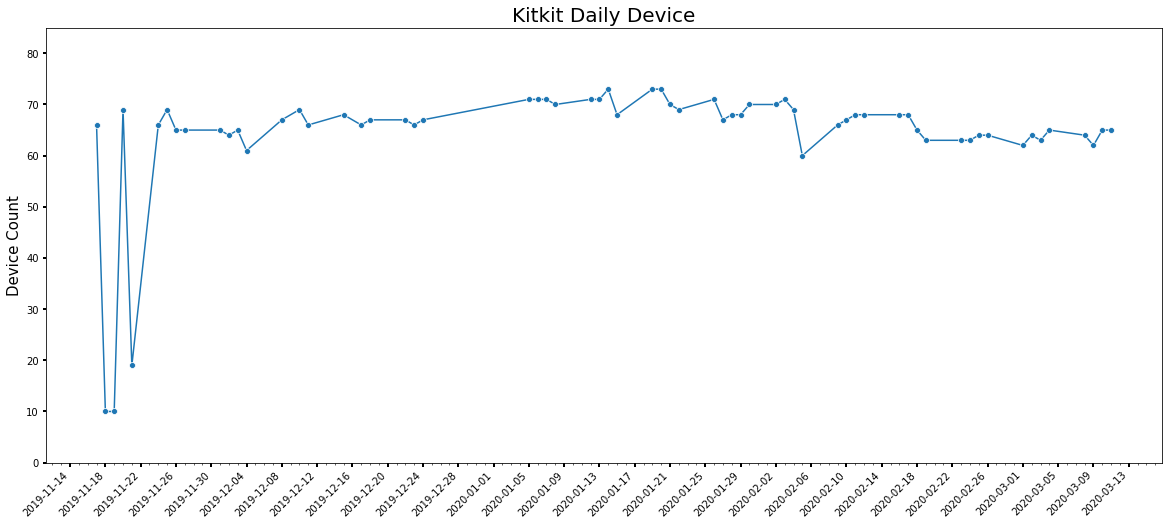

In [14]:
plt.figure(figsize=(20, 8))
line = sns.lineplot(x='yyyymmdd', y='device', data=device_df, marker='o')
plt.title('Kitkit Daily Device', size=20)
plt.xlabel('')
plt.ylabel('Device Count', size=15)
plt.xticks(rotation='45', ha='right')
line.set_ylim([0,85])
line.tick_params(which='major', width=2)
line.xaxis.set_major_locator(mdates.DayLocator(interval=4))
line.xaxis.set_minor_locator(mdates.DayLocator())
line.xaxis.set_minor_formatter(ticker.NullFormatter())
# for l in range(0,device_df.shape[0]):
#      line.text(device_df.yyyymmdd[l], device_df.device[l], device_df.device[l], horizontalalignment='center', size='medium', color='black')
plt.show()

In [15]:
session_stat_df = session_df.groupby('yyyymmdd').agg({'session_count':['mean', 'sum']}).reset_index()
session_stat_df = session_stat_df[session_stat_df[('session_count', 'sum')] > 0]
session_stat_df

yyyymmdd session_count     
                       mean  sum
2  2019-11-17      1.303030   86
3  2019-11-18      0.857143   12
4  2019-11-19      0.882353   15
5  2019-11-20      1.680556  121
6  2019-11-21      0.650000   13
7  2019-11-24      2.223881  149
8  2019-11-25      2.217391  153
9  2019-11-26      1.696970  112
10 2019-11-27      1.923077  125
11 2019-12-01      1.907692  124
12 2019-12-02      2.281250  146
13 2019-12-03      2.369231  154
14 2019-12-04      1.645161  102
16 2019-12-08      2.000000  134
18 2019-12-10      2.144928  148
19 2019-12-11      1.818182  120
21 2019-12-15      2.029412  138
22 2019-12-17      2.166667  143
23 2019-12-18      2.102941  143
25 2019-12-22      2.104478  141
26 2019-12-23      1.924242  127
27 2019-12-24      2.253731  151
29 2020-01-05      2.140845  152
30 2020-01-06      2.549296  181
31 2020-01-07      2.450704  174
32 2020-01-08      2.400000  168
34 2020-01-12      2.253521  160
35 2020-01-13      2.458333  177
36 2020-01-14      2.547945  186
37 2020-01-15      1.838235  125
..        ...           ...  ...
42 2020-01-22      2.449275  169
44 2020-01-26      2.140845  152
45 2020-01-27      2.373134  159
46 2020-01-28      2.338235  159
47 2020-01-29      2.380282  169
48 2020-01-30      1.742857  122
49 2020-02-02      2.253521  160
50 2020-02-03      2.394366  170
51 2020-02-04      2.420290  167
52 2020-02-05      2.100000  126
54 2020-02-09      2.424242  160
55 2020-02-10      2.447761  164
56 2020-02-11      2.441176  166
57 2020-02-12      2.397059  163
59 2020-02-16      2.470588  168
60 2020-02-17      2.441176  166
61 2020-02-18      2.276923  148
62 2020-02-19      1.777778  112
65 2020-02-23      2.301587  145
66 2020-02-24      2.190476  138
67 2020-02-25      2.312500  148
68 2020-02-26      2.312500  148
70 2020-03-01      2.109375  135
71 2020-03-02      2.359375  151
72 2020-03-03      2.125000  136
73 2020-03-04      2.092308  136
75 2020-03-08      2.095238  132
76 2020-03-09      2.016393  123
77 2020-03-10      2.031250  130
78 2020-03-11      2.015625  129

[63 rows x 3 columns]

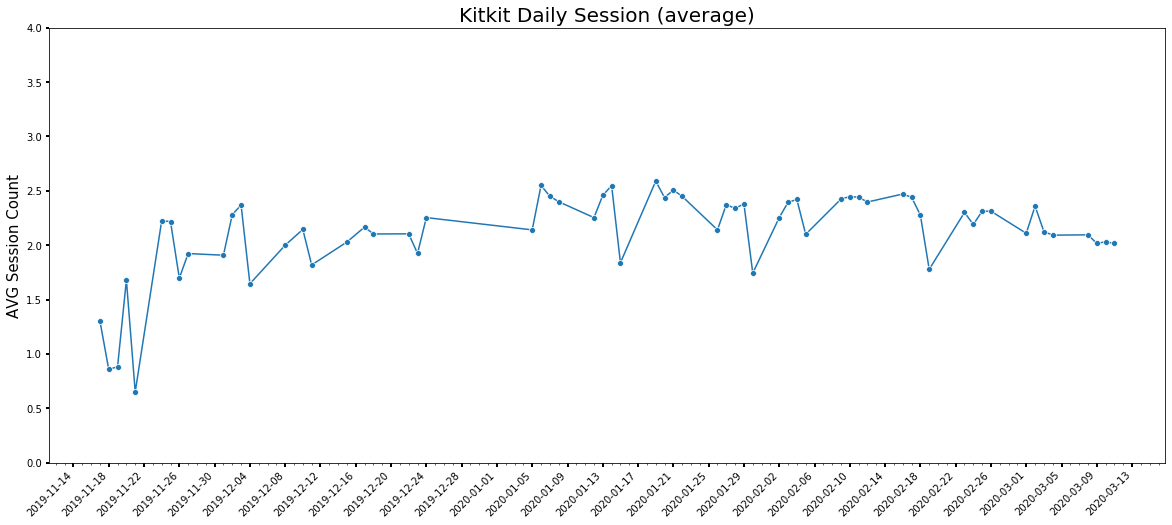

In [16]:
plt.figure(figsize=(20, 8))
line = sns.lineplot(x='yyyymmdd', y=('session_count', 'mean'), data=session_stat_df, marker='o')
plt.title('Kitkit Daily Session (average)', size=20)
plt.xlabel('')
plt.ylabel('AVG Session Count', size=15)
plt.xticks(rotation='45', ha='right')
line.set_ylim([0,4])
line.tick_params(which='major', width=2)
line.xaxis.set_major_locator(mdates.DayLocator(interval=4))
line.xaxis.set_minor_locator(mdates.DayLocator())
line.xaxis.set_minor_formatter(ticker.NullFormatter())
plt.show()

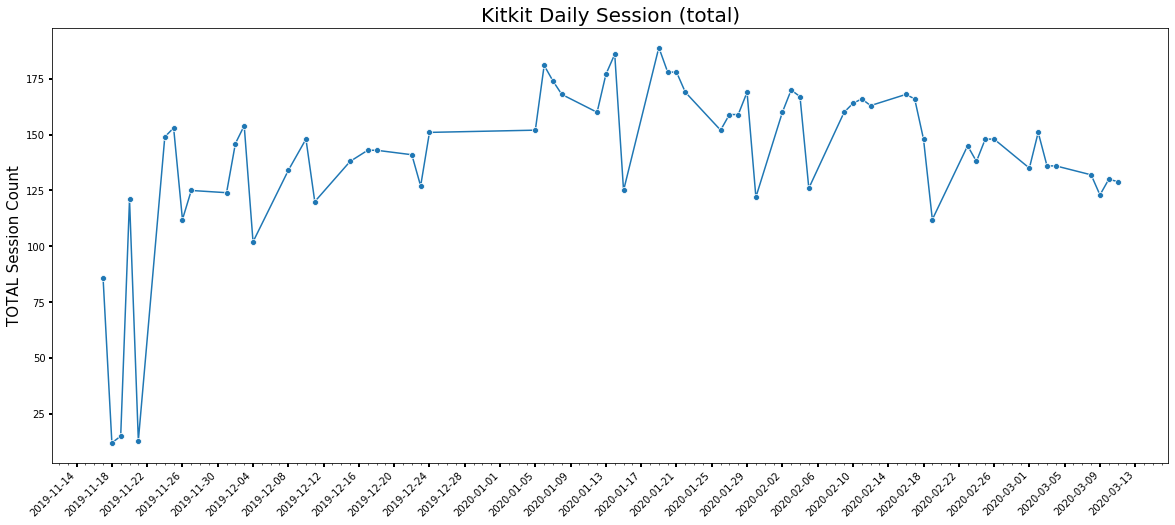

In [17]:
plt.figure(figsize=(20, 8))
line = sns.lineplot(x='yyyymmdd', y=('session_count', 'sum'), data=session_stat_df, marker='o')
plt.title('Kitkit Daily Session (total)', size=20)
plt.xlabel('')
plt.ylabel('TOTAL Session Count', size=15)
plt.xticks(rotation='45', ha='right')
line.tick_params(which='major', width=2)
line.xaxis.set_major_locator(mdates.DayLocator(interval=4))
line.xaxis.set_minor_locator(mdates.DayLocator())
line.xaxis.set_minor_formatter(ticker.NullFormatter())
plt.show()

In [18]:
df = base_df[base_df.contentname!=''].groupby(['package', 'content', 'contentname', 'act']).agg({'id':'count', 'duration':'sum'}).reset_index()
df.to_csv('~/Desktop/kitkit.csv', index=None)